# Question 3. Gaussian Discriminant Analysis  [40 pts.]

### A. Theoritical Questions.  [20 pts.]

#### Write a short note about : 

1. Difference between $\textbf{Generative}$ model and $\textbf{Discrimininative}$ model ? 
2. Difference between $\textbf{Linear}$ and $\textbf{Quadratic}$ decision boundaries w.r.t GDA ?
3. Difference between $\textbf{Gaussian Discriminant Analysis}$ and $\textbf{Logistic Regression}$ as a classifier ?
4. Difference between $\textbf{Univariate}$ & $\textbf{Multivariate}$ GDA.


1. Discriminative model predicts the label by calculating the probability of the instance is this label given the feature values. In this case, the discriminative model models
the decision boundary between the classes. In other word, the discriminative model predicts the unseen data on conditional probability. Generative model focuses on the distribution
of a dataset to return a probability for a given example. The generative model learns the joint probability distribution. For instance, if we are predicting an animal is a sheep or
a goat: in discriminative model, we extract the features from this animal, and calculation the probability that it's a sheep and the probability that it's a goat given the features; in
generative model, we generate a sheep by learned sheep features and also generate a goat by learned goat features, and then extract the animal's features to check if it's more likely
to be a sheep or a goat.

2. Linear decision boundary is calculated by a linear equation, and if the decision boundary is linear, the covariance matrix of different classes are identical; Quadratic decision boundary
is calculated by quadratic functions, if the decision boundary is quadratic, the covariance matrix of different classes are different. In visualization, the linear decision boundary performs
as a hyperplane that separates the different classes; the quadratic decision boundary may perform as an uneven hyperplane.

3. Gaussian discriminant analysis is a generative model, but logistic regression is a discriminative model. Gaussian discriminant analysis makes more specific assumptions about the dataset than logistic
regression; on the other hand, logistic regression makes more generic assumptions and is useful when the distribution of features is not Gaussian. Also, if P(x|y) above is multivariate gaussian with shared
covariance, then we can calculate P(y|x) and find out that it follows a logistic function. However, if P(y|x) follows a logistic function, P(x|y) may not be multivariate gaussian with shared
covariance. Thus, when the data follows the Gaussian distribution, Gaussian discriminant analysis will perform better and have a better efficiency, which achieve a good performance from fewer instances.
Logistic regression's generic model performs robuster, especially when data distribution is not Gaussian.

4. Univariate GDA analyses a single variable, and multivariate GDA analyses more than one variable. Univariate GDA implies the distribution of a single variable, while multivariate GDA implies the relationship
between several variables. Data distribution in univariate GDA will be the distribution of a single variable which contains only one center, however, data distribution in multivariate GDA will be the distribution
of more than one variable which contains multiple centers.

### B. Coding Question. [20 pts.]

Given data set $\textbf{"gaussian_discriminant_analysis.csv"}$ , plot the decison boundry [Linear] using $\textbf{GDA}$ .

The data contains 100 data points [50 for each class].

Note : The implementations must be done from scratch, data manipulation libraries like numpy, pandas etc are allowed.

In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## TODO : Required imports as necessary.

In [2]:
## TODO : Import the data as necessary.
data = pd.read_csv('gaussian_discriminant_analysis.csv', names = ['Col_0', 'Col_1', 'Label'])
data.head()

,Col_0,Col_1,Label
0,-0.590912,0.221098,0
1,-0.366340,1.578768,0
2,1.111379,3.185019,0
3,0.329676,2.633543,0
4,1.259236,3.327122,0


In [3]:
## To ensure your data is not curropted, run "df.describe" atleast once to be sure,
## below is a representation of how "df.describe" must look like.
data.describe()

,Col_0,Col_1,Label
count,100.000000,100.000000,100.000000
mean,3.927237,5.027441,0.500000
std,3.137358,3.340557,0.502519
min,-0.651939,-0.552670,0.000000
25%,0.961299,1.870980,0.000000
50%,3.645872,4.503459,0.500000
75%,6.917812,8.144461,1.000000
max,9.811431,11.771933,1.000000


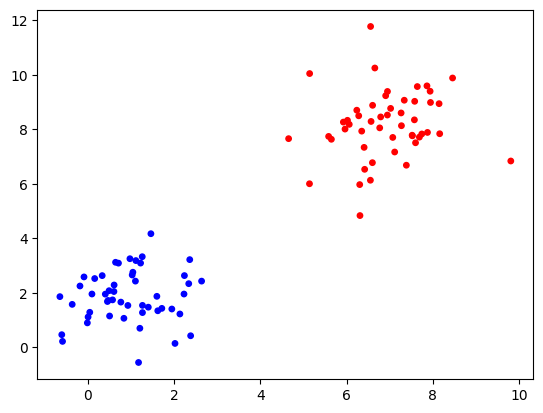

In [4]:
## Manipulate data as neccesary & create a scatter plot using any plotting library [preferably 'matplotlib'].
## Below is how the data must look like.
## Blue : the data with label 0 [positive].
## Red  : the data with label 1 [negative].

## TODO: Your code below.
plt.scatter(data['Col_0'], data['Col_1'], s = 15, c = data['Label'].map(lambda x: 'red' if x == 1 else 'blue'))

In [5]:
## A boiler plate sample code on how you may create your GDA class.
## This is a suggestive code & you may code it according your own way.

def get_mu(x, y):
    num_fea = x.shape[1]

    mu0_col = np.sum(x[np.where(y == 0)], axis = 0)
    mu0_lbl = len(np.where(y == 0)[0])
    mu0 = (mu0_col / mu0_lbl).reshape(num_fea, 1)
    mu1_col = np.sum(x[np.where(y == 1)], axis = 0)
    mu1_lbl = len(np.where(y == 1)[0])
    mu1 = (mu1_col / mu1_lbl).reshape(num_fea, 1)

    return mu0, mu1

def get_sigma(x, y, mu):
    ttl, num_fea = x.shape
    sigma = np.zeros((num_fea, num_fea))
    for i in range(ttl):
        xi = x[i, :].reshape(num_fea, 1)
        mu_yi = mu[0] if y[i] == 0 else mu[1]
        sigma += (xi - mu_yi).dot((xi - mu_yi).T)

    sigma *= (1 / ttl)
    return sigma

def gaussian_2d(x, y, mux, muy):
    return np.exp(-0.5 * ((x - mux)**2 + 0.5 * (y - muy)**2))

class GDA():
    def __init__(self):
        self.phi   = 0  # TODO : Initialise it with appropriate value/variable/placeholder.
        self.mu0   = 0  # TODO : Initialise it with appropriate value/variable/placeholder.
        self.mu1   = 0  # TODO : Initialise it with appropriate value/variable/placeholder.
        self.sigma = 0  # TODO : Initialise it with appropriate value/variable/placeholder.

    def train(self, x, y):
        mu = get_mu(x.values, y.values.flatten())

        self.phi = len(np.where(y == 1)) / x.shape[0]            # TODO : Manipulate it accordingly.
        self.mu0 = mu[0]                                            # TODO : Manipulate it accordingly.
        self.mu1 = mu[1]                                            # TODO : Manipulate it accordingly.
        self.sigma = get_sigma(x.values, y.values.flatten(), mu)    # TODO : Manipulate it accordingly. [HINT : matrix manipulations].

In [6]:
X_train = data.iloc[:, : -1]    # TODO : Manipulate it accordingly.
Y_train = data.iloc[:, -1]      # TODO : Manipulate it accordingly.

gda = GDA()
gda.train(X_train, Y_train)

# TODO : Operations to get decison boundry.

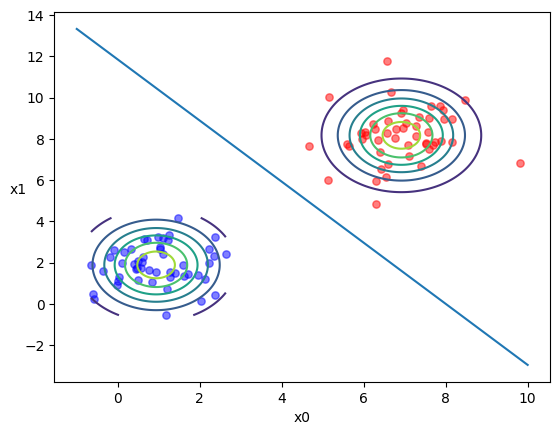

In [7]:
"""
Draw GDA Decision Boundary Along with data points.
Note : The decision line must separate the data points clearly.
"""
pos_data = X_train.values[np.where(Y_train.values.flatten() == 1)]
neg_data = X_train.values[np.where(Y_train.values.flatten() == 0)]

fig = plt.figure()
plt.scatter(pos_data[:, 0], pos_data[:, 1], color = "red", alpha = 0.5, marker = 'o', s = 28)
plt.scatter(neg_data[:, 0], neg_data[:, 1], color = "blue", alpha = 0.5, marker = 'o', s = 28)
plt.xlabel('x0')
plt.ylabel('x1', rotation = 'horizontal')

# Decision boundary
w0 = gda.mu0.T.dot(np.linalg.inv(gda.sigma).dot(gda.mu0))
w1 = gda.mu1.T.dot(np.linalg.inv(gda.sigma).dot(gda.mu1))
theta01 = np.linalg.inv(gda.sigma).dot(gda.mu1 - gda.mu0).flatten()
theta0 = 0.5 * (w0 - w1)[0][0] - np.log((1 - gda.phi) / gda.phi)

x_range = np.linspace(-1, 10, 1200)
y_range = []
for i in x_range:
    pt = (theta0 + theta01[0] * i) / (-theta01[1])
    y_range.append(pt)
plt.plot(x_range, y_range)

""" Draw contour Along with GDA Decision Boundary and data points. """
# Contour for label 0
l0_min_x0 = min(X_train.values[np.where(Y_train.values.flatten() == 0)][:, 0])
l0_max_x0 = max(X_train.values[np.where(Y_train.values.flatten() == 0)][:, 0])
l0_min_x1 = min(X_train.values[np.where(Y_train.values.flatten() == 0)][:, 1])
l0_max_x1 = max(X_train.values[np.where(Y_train.values.flatten() == 0)][:, 1])
l0_x0_grid = np.linspace(l0_min_x0, l0_max_x0, 100)
l0_x1_grid = np.linspace(l0_min_x1, l0_max_x1, 100)

l0_x0,l0_x1=np.meshgrid(l0_x0_grid, l0_x1_grid)
l0_z0 = gaussian_2d(l0_x0, l0_x1, gda.mu0[0], gda.mu0[1])
plt.contour(l0_x0, l0_x1, l0_z0)

# Contour for label 1
l1_min_x0 = min(X_train.values[np.where(Y_train.values.flatten() == 1)][:, 0])
l1_max_x0 = max(X_train.values[np.where(Y_train.values.flatten() == 1)][:, 0])
l1_min_x1 = min(X_train.values[np.where(Y_train.values.flatten() == 1)][:, 1])
l1_max_x1 = max(X_train.values[np.where(Y_train.values.flatten() == 1)][:, 1])
l1_x0_grid = np.linspace(l1_min_x0, l1_max_x0, 100)
l1_x1_grid = np.linspace(l1_min_x1, l1_max_x1, 100)

l1_x0,l1_x1=np.meshgrid(l1_x0_grid, l1_x1_grid)
l1_z0 = gaussian_2d(l1_x0, l1_x1, gda.mu1[0], gda.mu1[1])
plt.contour(l1_x0, l1_x1, l1_z0)

plt.show()